# Unsupervised analysis of Days of Week
Treating crossings each day as features to learn about the realtionships between various days

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

from jupyterworkflow.data import get_fremont_data

%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-darkgrid')

In [3]:
data = get_fremont_data()
pivoted = data.pivot_table("Total", index = data.index.time, columns = data.index.date)

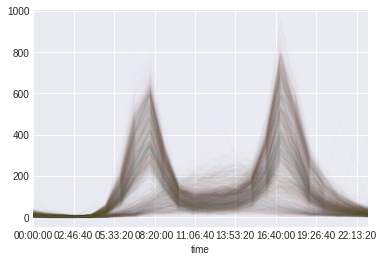

In [4]:
pivoted.plot(legend=False, alpha=0.01);

## Principal Component Analysis

In [5]:
X = pivoted.values.T

In [6]:
X2 = PCA(2, svd_solver='full').fit_transform(X)

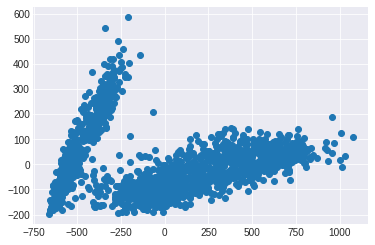

In [7]:
plt.scatter(X2[:,0], X2[:,1]);

## Unsupervised Cluster Model

In [8]:
gm = GaussianMixture(2)

In [10]:
gm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [11]:
labels = gm.predict(X)

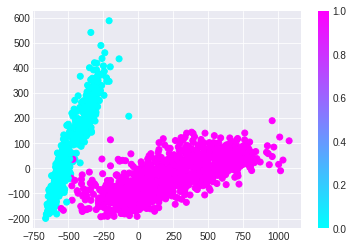

In [12]:
plt.scatter(X2[:,0], X2[:,1], c=labels,cmap='cool')
plt.colorbar();

## Bike Usage patterns

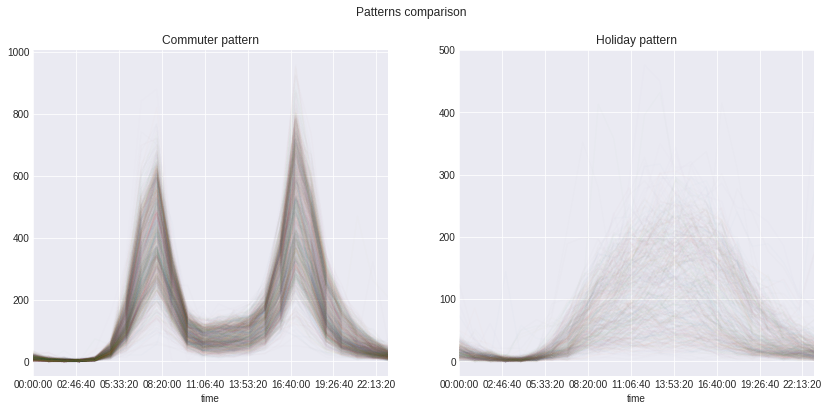

In [13]:
fig, ax = plt.subplots(1,2, figsize =[14,6])
pivoted.T[labels==1].T.plot(legend=False, alpha=0.01, ax=ax[0])
pivoted.T[labels==0].T.plot(legend=False, alpha=0.01, ax=ax[1])
ax[0].set_title("Commuter pattern")
ax[1].set_title("Holiday pattern")
fig.suptitle("Patterns comparison");

## Analyzing outliers

In [14]:
day_of_week = pd.to_datetime(pivoted.columns).dayofweek

### following dates are weekdays with holiday like bike usage pattern

In [15]:
pivoted.columns[(labels==0) & (day_of_week<5)]

Index([2012-11-22, 2012-11-23, 2012-12-24, 2012-12-25, 2013-01-01, 2013-05-27,
       2013-07-04, 2013-07-05, 2013-09-02, 2013-11-28, 2013-11-29, 2013-12-20,
       2013-12-24, 2013-12-25, 2014-01-01, 2014-04-23, 2014-05-26, 2014-07-04,
       2014-09-01, 2014-11-27, 2014-11-28, 2014-12-24, 2014-12-25, 2014-12-26,
       2015-01-01, 2015-05-25, 2015-07-03, 2015-09-07, 2015-11-26, 2015-11-27,
       2015-12-24, 2015-12-25, 2016-01-01, 2016-05-30, 2016-07-04, 2016-09-05,
       2016-11-24, 2016-11-25, 2016-12-26, 2017-01-02, 2017-02-06],
      dtype='object')

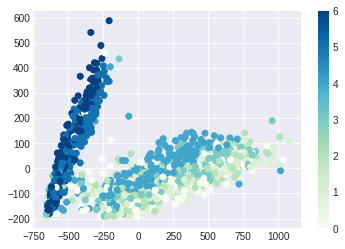

In [16]:
plt.scatter(X2[:,0], X2[:,1], c=day_of_week, cmap='GnBu')
plt.colorbar();